In [2]:
from example import f_m_func

f_m = f_m_func()
print(f_m)

#f_m is a function for a specific measurement, which connects *_sp sensor pose with land mark observaion *_lm

-log(sigma_d) - log(sigma_fa) - log(x_lm**2 - 2*x_lm*x_sp + x_sp**2 + y_lm**2 - 2*y_lm*y_sp + y_sp**2)/2 - log(pi) - 0.693147180559946 - 0.5*(sigma_d**2*(mu_fa - atan2((-x_lm + x_sp)*sin(yaw_sp) + (y_lm - y_sp)*cos(yaw_sp), (2*(x_lm - x_sp)*cos(yaw_sp)**2 + (y_lm - y_sp)*sin(2*yaw_sp))/(2*cos(yaw_sp))))**2 + sigma_fa**2*(mu_d - sqrt(x_lm**2 - 2*x_lm*x_sp + x_sp**2 + y_lm**2 - 2*y_lm*y_sp + y_sp**2))**2)/(sigma_d**2*sigma_fa**2)


(400, 600, 1)


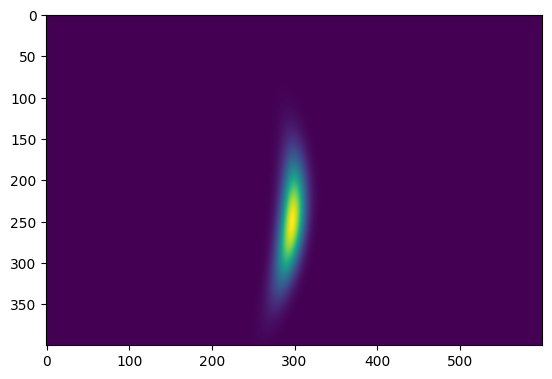

In [8]:
import numpy as np
import os
parentdir = os.path.dirname(os.path.dirname(os.path.abspath('')))
parentdir = os.path.dirname(os.path.dirname(parentdir))
os.sys.path.insert(0, parentdir) 
from equations.methodology.pytorchsymbolic.sympytorch import SymPyModule
import torch

import matplotlib.pyplot as plt

init_vals = {
    'mu_fa': 0.,
    'sigma_fa': 0.1,
    'mu_d': 5,
    'sigma_d': 0.1,

    'x_sp': 0,
    'y_sp': 0,
    'yaw_sp': 0.1
}

sm = SymPyModule([f_m], init_vals=init_vals)

x, y = np.mgrid[0:6:0.01, -2:2:0.01]

p = sm(x_lm=torch.Tensor(x), y_lm=torch.Tensor(y))
p = p.detach().numpy()
p = np.transpose(p, (1, 0, 2))
print (p.shape)

fig, ax = plt.subplots()
im = ax.imshow(np.exp(p))

plt.show()